In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
classification_df = pd.read_csv("classification.csv")
regression1_df = pd.read_csv("regression_1.csv")
regression2_df = pd.read_csv("regression_2.csv")


In [3]:
classification_df

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1
...,...,...,...
495,-10.392365,-3.890568,1
496,-9.143800,-4.747003,1
497,-10.010185,-4.373446,1
498,-2.262481,4.878788,0


<Axes: xlabel='x1', ylabel='x2'>

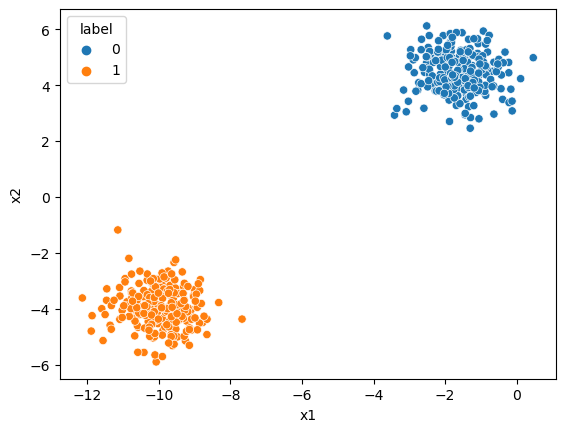

In [4]:
sns.scatterplot(data=classification_df, x='x1', y='x2', hue='label')

In [5]:

regression1_df

,x1,x2
0,0.0,-0.674904
1,0.1,-0.479806
2,0.2,-0.806082
3,0.3,0.053077
4,0.4,-0.393342
...,...,...
58,5.8,-0.930421
59,5.9,-1.674052
60,6.0,-0.473458
61,6.1,-1.529905


In [6]:
regression1_df.describe()

,x1,x2
count,63.00000,63.000000
mean,3.10000,-0.016079
std,1.83303,1.167700
min,0.00000,-2.112807
25%,1.55000,-0.868252
50%,3.10000,-0.043282
75%,4.65000,0.865807
max,6.20000,2.281413


<Axes: xlabel='x1', ylabel='x2'>

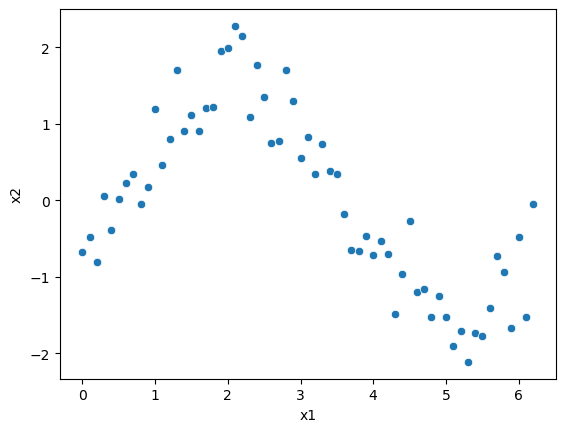

In [7]:
sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])

<Axes: xlabel='x1', ylabel='x2'>

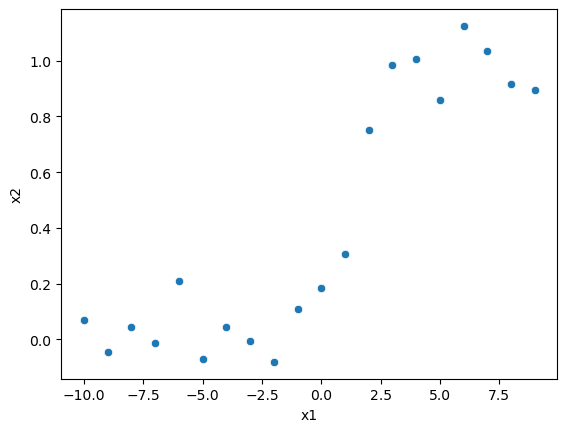

In [136]:
sns.scatterplot(data=regression2_df,x=regression2_df["x1"],y=regression2_df["x2"])

# TASK 2

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np

In [13]:
def linear_function(x,m,b):
    """Returns the equation of a linear function given x, slope(m), and intercept(b)"""
    return m*x + b


In [93]:
x = np.arange(-15,0,0.5)
@interact(m=(-5.0,5.0,0.25),b=(-10.0,0,0.5))
def fitting_line(m=0,b=0):
    y = linear_function(x,m,b)
    plt.plot(x,y)
    sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])    
    plt.xlim([-16,1])
    plt.ylim([-8,8])
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0, step=0.25), FloatSlider(value…

In [43]:
from scipy.optimize import minimize
import math

In [48]:
math.sin(math.pi/2)

1.0

In [73]:
def quadratic_function(x,a,b,c):
    return a*x*x + b*x + c
def degrees_to_radians(x):
    return (math.pi/180)*x


In [57]:
def reduce_MSE(params, x_data, y_data):
    """function to reduce mean squared error"""
    
    return ((y - sine_function(x,a))**2).sum()

In [66]:
m = minimize(reduce_MSE,[1.0,0.5],args=(regression1_df["x1"],regression1_df["x2"]))
m

TypeError: reduce_MSE() takes 2 positional arguments but 3 were given

In [122]:
def sine_function(x,A,B,C):
    return A*np.sin(B*x+C)

In [78]:
sine_function(45,1,1,0)

0.7071067811865476

In [123]:
x = np.arange(-1,7,0.25)
@interact(a=(-6.0,6.0,0.25),b=(0,5,0.25),c=(-5,5,0.5))
def fitting_line(a=0,b=0,c=0):
    y = sine_function(x,a,b,c)
    plt.plot(x,y)
    sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])    
    plt.xlim([-1,7])
    plt.ylim([-6,4])
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0, min=-6.0, step=0.25), FloatSlider(value…

In [124]:
from scipy.optimize import curve_fit

In [133]:
popt1, pcov1 = curve_fit(sine_function, regression1_df["x1"], regression1_df["x2"])

In [172]:
popt1

array([ 1.55867731,  1.02759923, -0.56002132])

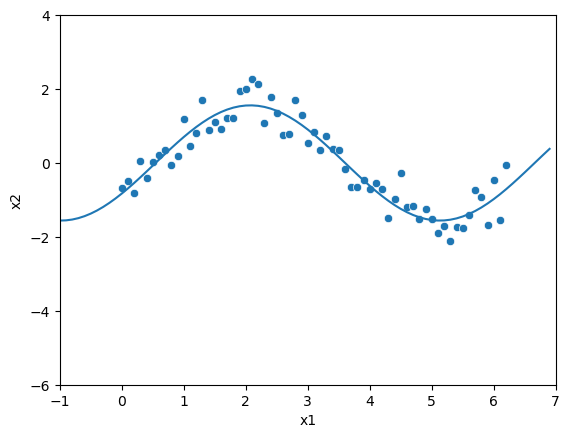

In [134]:
x = np.arange(-1,7,0.1)
y = sine_function(x,*popt1)
plt.plot(x,y)
sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])    
plt.xlim([-1,7])
plt.ylim([-6,4])
plt.show()

In [189]:
def exponential_function(x,a,b):
    return a/(1+np.exp(x*b))

In [190]:
popt2, pcov2 = curve_fit(exponential_function, regression2_df["x1"], regression2_df["x2"])

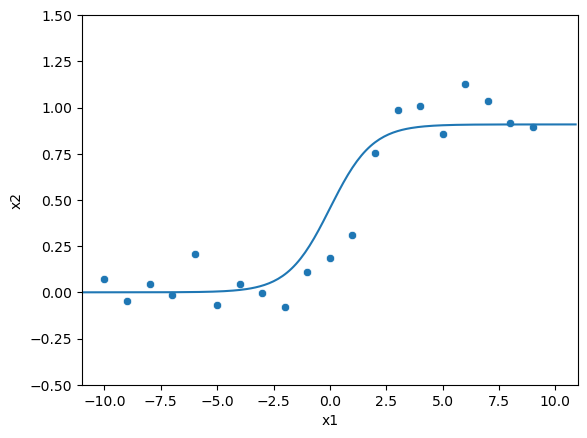

In [191]:
x = np.arange(-11,11,0.1)
y = exponential_function(x,*popt2)
plt.plot(x,y)
sns.scatterplot(data=regression2_df,x=regression2_df["x1"],y=regression2_df["x2"])    
plt.xlim([-11,11])
plt.ylim([-0.5,1.5])
plt.show()

In [201]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
svm = SVC(kernel='poly',degree=2)
svm.fit(classification_df["x1"].to_numpy(),classification_df["x2"].to_numpy())

ValueError: Expected 2D array, got 1D array instead:
array=[-10.09794953  -2.25557887 -10.56203725  -0.1260701   -9.24942232
  -0.32629881  -1.22697003 -10.09525877  -1.4423693   -9.69956838
  -9.34583353  -9.22168077 -10.13109631  -0.8659213   -1.73655395
 -10.15644464  -1.4031275  -10.18557242  -0.63608435  -9.88244696
 -10.94114796 -10.10306553  -1.28934408  -1.79384479  -9.42767231
 -10.66162026  -1.52896693  -2.4259982   -3.08560076  -8.77520794
  -2.37488007  -1.90025748 -10.66415597 -10.41305313  -9.0011824
  -9.08091837  -1.31492432  -2.04980621 -10.1790005   -1.65021303
  -9.6178608   -9.77282636  -1.41417772  -9.90513906 -10.74522611
 -10.76572056  -3.41406836  -9.92487513  -1.60508512  -1.87664165
  -1.62899161 -10.03927004 -10.57872019 -10.06241513   0.46204007
  -9.92209093 -10.02513728  -0.81364048  -1.33290962  -1.82611926
  -2.51338098  -1.3175972   -1.22429745  -9.51891157  -1.07227152
  -1.64425592  -9.68256008  -2.31330016  -1.99232092  -8.32461033
  -9.88531701  -1.3674485  -10.02290563 -10.19080475  -8.85552844
  -0.22132303  -8.8630739  -10.02310941 -10.67059702  -0.87317139
  -9.87880402  -1.74558306 -11.08757159  -1.23793641  -2.5206006
  -2.44108892  -2.32835759  -1.37711576  -2.76496931 -10.08322031
  -1.54753396 -10.6387668   -1.07095682 -11.4581859   -0.67428191
 -10.75420999  -3.02603361  -9.78084077 -11.35924537  -2.11240159
  -1.88810955 -10.3240209   -2.48718259  -2.27365697  -1.66088394
  -2.23528694 -10.07223459  -0.93238268  -1.36311386  -2.150501
  -1.34445105  -2.09729931  -1.5207501   -1.85492831  -2.1405808
  -1.83748581  -0.82031739  -9.59148142  -1.46309435  -9.34310906
 -10.22595542  -2.57413376 -10.31951488  -9.30824633 -10.02348486
  -1.56572617  -2.96014721  -9.47736292  -9.54366195  -3.15928662
  -1.68664676  -1.71871553  -1.92192319 -10.88703505 -10.72958648
 -10.31699479  -2.05317371 -10.21954334  -0.76793075  -1.4896913
 -10.17388445  -2.03212372  -9.87098538  -1.57544864  -1.88525195
  -2.55035103 -11.5918211   -1.94995274  -9.94713617 -10.31040195
 -10.14797019  -1.46601039  -1.62399448  -9.71052648  -2.44294068
  -9.5966386   -9.77500456  -1.9691204   -1.79610004  -2.24068023
  -0.63693524  -2.20689808  -1.46023623  -0.49769838 -10.10497782
  -9.81176282  -9.09222777  -9.57322974  -1.30050903  -9.40041497
  -1.0743566   -2.43495866  -1.29900838   0.11026809  -1.33674504
 -10.62679074  -1.94770732 -10.13740501  -9.76165785  -9.68384605
  -3.61471941  -0.86741933  -9.68614481 -10.29485746  -9.3213579
  -9.30890394  -9.7375433   -0.82107832  -9.5232472   -1.67679178
  -0.39218547 -11.55669135 -10.20839581  -9.72206109  -1.84708156
  -9.32956554  -1.95555978  -9.09388027  -1.45964878 -10.41852226
  -1.90105095 -10.59796028  -9.51291046  -9.89813654  -9.18075989
  -0.42738545  -9.79605779 -10.55127247  -2.47167898  -9.43906785
  -0.85672964 -10.41497294 -10.90439302  -9.18470452  -9.45169351
  -2.44167715  -1.29877024  -2.1294322   -9.19089311 -10.31967249
  -0.9314975   -9.25548325  -1.34366109  -2.6581487   -1.61703477
  -9.7500032   -1.95281643  -1.1045951  -10.53517513  -2.15364826
 -10.12205504  -2.88870785  -1.78025965  -2.81506479  -1.09336885
  -9.29213597  -1.09825718  -9.03188177 -10.6821536   -2.35747376
  -7.67295737 -10.64652286  -9.47177644 -10.7487875  -10.36336203
  -1.46168691 -10.66334898  -0.21351158 -11.02255001  -2.14372243
  -1.9725499   -9.89963559  -9.57156394  -1.3506048   -2.73671518
  -1.22320638  -9.71869363  -1.34342874  -2.14983886  -9.85788082
  -1.05377457  -1.585204    -0.2237385   -1.48540049 -10.21790721
 -11.08460165  -9.73699271  -1.04988104  -1.89145812  -1.10304164
  -9.56740411  -0.72753993  -1.09189373  -9.72161288  -2.42999333
  -1.40249764 -10.82448472  -1.26562714 -10.83481556  -0.43819167
 -10.60671826  -9.77914542  -1.30733054 -10.01998452  -2.67043957
  -0.52020438 -10.39611656  -0.89026247  -2.19667678  -0.64355942
  -9.63038716  -9.89497682  -8.65104171 -10.3539931   -0.96912527
  -8.83772526  -1.82506577  -9.53453575 -11.45147392  -9.02729252
 -10.72514013  -9.44805366  -0.16308026 -11.09372921  -9.28472577
  -1.11536646 -11.32439937 -10.4124354   -1.12839594  -2.49904753
  -9.96249054  -9.58468488  -9.57312862  -1.64737332  -1.31291198
 -10.19818194 -11.24925153  -0.87949182  -2.62074203 -10.76094934
  -9.14010341  -0.12965712  -1.19822505  -9.27429694  -1.59276234
  -1.84591286  -1.22480202  -8.92213707 -11.88656572  -9.42648192
  -1.14117039  -1.06226305  -9.74871042  -9.18481252  -1.78620412
  -2.04160182  -9.46893808  -8.95059317  -0.68741433  -8.6538579
  -9.56914974  -1.52591907  -2.18257071  -0.95247088  -1.44944068
  -0.84732291  -2.59192607  -1.74388511  -9.32113503 -10.19571699
  -9.82935862  -2.45932264  -1.75474403 -10.24916937  -9.69252217
  -2.12902351  -1.55017521  -1.73687282  -9.52687868  -1.43623254
  -0.92806382 -11.49882334  -1.81969599  -1.49849359 -10.62256518
 -10.52667644 -10.94180002  -1.0513396  -10.12609264 -10.3415001
  -9.97325199  -9.24943237  -9.90784861  -9.28986756  -2.20406108
  -9.51235615  -2.18763846 -10.77711778  -1.63001028  -1.92225937
  -1.25030728  -2.0935605  -10.02981918  -1.2013538   -9.71919621
 -10.56390554  -2.83149697  -0.37525757  -1.57428502  -9.89856413
  -9.64962413  -1.35284346 -11.02069503  -2.86313604  -1.85677529
  -1.18351102  -2.0083094  -10.25154096  -1.99496988  -8.73520022
  -1.49681371  -9.85134483  -9.65431977  -9.89270111 -10.26337476
  -9.57826324 -10.10760807  -1.68431745  -1.77729909 -10.09206769
  -1.6475446  -10.55739575  -2.97077259  -2.52535727  -9.08336826
  -0.56839603  -1.92894248  -9.87509509  -1.02896074  -1.9002904
  -9.22614679  -1.75507123 -10.35049427  -9.65167335  -1.1968457
  -0.87456751  -1.97367653  -9.64671179  -1.06266706 -10.13696872
  -9.55210412  -1.28893418  -9.64005606  -9.69321368  -1.94017464
 -11.32688095 -10.12344111  -8.81204612  -1.64799061  -2.02928013
  -9.7277909   -9.72253603  -9.34986165 -11.86260066  -3.34901201
  -3.01988629  -9.37763444  -9.7751025   -9.48982714  -9.93121523
  -8.97814333  -9.29373183  -9.14515387  -9.75193068  -8.9202676
  -1.79885863 -11.14392722 -10.12585589  -1.87390271  -1.81518961
  -9.91977642  -1.7333012  -10.36879636  -1.79015875  -0.52769519
  -1.06724745  -1.70808999 -10.00993097  -1.34377385  -9.62589785
  -2.66817312  -1.43861544 -10.30445269  -8.89488497  -1.0284464
 -10.3320191   -1.80578587 -10.15340232 -10.58570474  -1.29515647
  -1.22658251 -10.41468002  -1.74074954 -10.61384485  -8.98769865
  -2.16747789  -1.35889161  -1.18748263 -10.22804859 -10.27399528
  -2.02152603  -1.7901652  -12.13534757 -10.20001064 -10.73205993
 -10.39236462  -9.14380044 -10.01018479  -2.26248136 -10.97688148].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.